In [72]:
import sys
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import random

!conda install --yes --prefix {sys.prefix} plotly

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


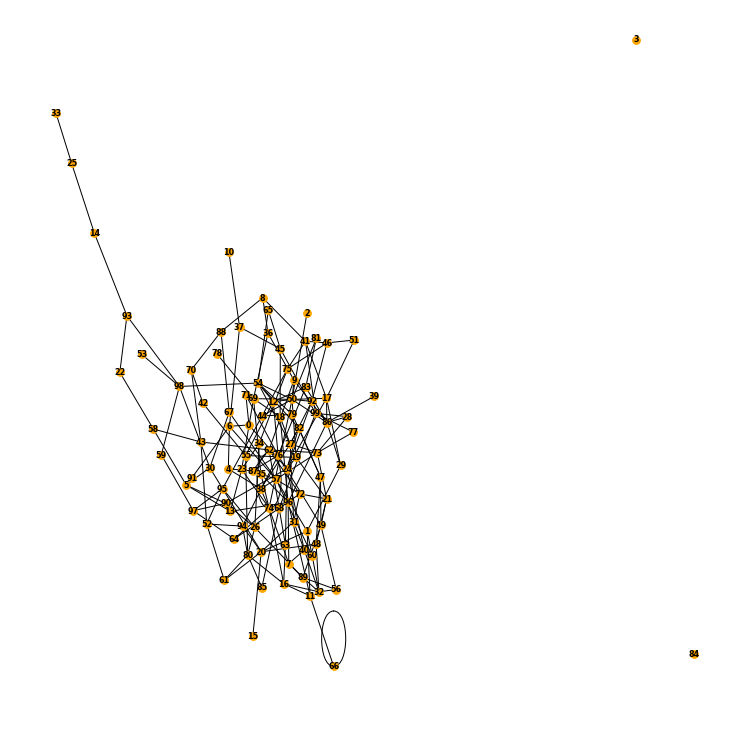

In [90]:
G = nx.Graph()
start = 0
end = 100
nodes = list(range(start, end))
G.add_nodes_from(nodes)
for i in range(start, 200):
    vertex_a = random.randint(start, end - 1)
    vertex_b = random.randint(start, end - 1)
    G.add_edge(vertex_a, vertex_b)
fig = plt.figure(1, figsize=(10, 10))
nx.draw(G,with_labels=True, font_weight='bold', node_color='orange',node_size=60,font_size=8)

In [91]:
adjacency_matrix = nx.to_numpy_matrix(G)
print(adjacency_matrix[:10])
## adjacence matrix for first 10 rows

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [92]:
## adjacency list
adjacency_list = nx.generate_adjlist(G)
for i in range(10):
    print(next(adjacency_list))

0 6 71 24
1 60 29 20 11 57
2 50
3
4 38 87 6
5 13 58 90 30
6 37 57 91
7 40 96 89 74
8 88 36 41
9 36 62 86 50


In [93]:
## the only benefit in matrix is querying (fast edge between a and b check for O(1))

In [96]:
## DFS for components search
def DFS(temp, v, visited):
 
        # Mark the current vertex as visited
        visited[v] = True
 
        # Store the vertex to list
        temp.append(v)
 
        # Repeat for all vertices adjacent
        # to this vertex v
        for i in G.edges(v):
            if visited[i[1]] == False:
 
                # Update the list
                temp = DFS(temp, i[1], visited)
        return temp
 
# Method to retrieve connected components
# in an undirected graph
def connectedComponents(V):
    visited = []
    components = []
    for i in range(V):
        visited.append(False)
    for v in range(V):
        if visited[v] == False:
            temp = []
            components.append(DFS(temp, v, visited))
    return components
components = connectedComponents(end)
for component in components:
    print(component)


[0, 6, 37, 10, 45, 18, 96, 11, 1, 60, 57, 38, 4, 87, 76, 49, 89, 26, 34, 23, 13, 5, 58, 22, 93, 98, 30, 67, 88, 8, 36, 9, 62, 72, 68, 85, 80, 61, 52, 95, 97, 64, 74, 50, 44, 79, 54, 12, 55, 42, 70, 43, 19, 24, 40, 7, 32, 48, 20, 31, 27, 73, 77, 99, 28, 86, 17, 29, 41, 46, 75, 51, 92, 39, 83, 81, 21, 82, 47, 94, 15, 56, 16, 63, 90, 65, 69, 71, 78, 35, 2, 59, 53, 14, 25, 33, 66, 91]
[3]
[84]


In [97]:
## bfs for shortest path between two random V
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph.edges(node)
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour[1])
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour[1] == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("no path")
print(BFS_SP(G, 4, 9))

Shortest path =  4 87 62 9
None
